# 1. Random Walks
https://ko.wikipedia.org/wiki/%EB%AC%B4%EC%9E%91%EC%9C%84_%ED%96%89%EB%B3%B4<br><br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [29]:
def RWG(t, n): # t시간까지 간 거리 x n번 실행
    if (t==0 or n==0):
        return 0
    else :
        T = range(1,t) # 1~t 시간까지
        Sn = [] # 초기화
        for i in range(n): # n 번 실행
            RW, S = [], [] # 초기화
            for i in range(t-1) : # t-1 회 random walk
                rw = random.choice([-1,1]) # random walk
                RW.append(rw) # random walk 모음
                s = sum(RW) # s 는 RW 의 합 = 위치
                S.append(s) # S 는 1 ~ t-1 실행의 위치 모음
            sn = S[t-2] # S[t-2] 는 실행 t-1 후의 최종위치.
            Sn.append(sn) # Sn은 n번 실행동안 시간 t 이후의 최종위치 모음
        return plt.plot(T,S,'.'), sn # 마지막 시행(t-1시행) 때의 그래프, 최종위치

(a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하여라. (몬테카를로 시뮬레이션)

(([<matplotlib.lines.Line2D at 0x1d3e0925310>], 67),
 ([<matplotlib.lines.Line2D at 0x1d3e0bd1130>], -31),
 ([<matplotlib.lines.Line2D at 0x1d3e0bd16a0>], 13))

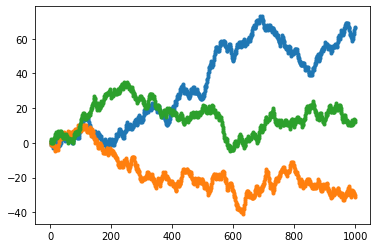

In [30]:
K,L,M = RWG(1000,1),RWG(1000,1),RWG(1000,1)
K,L,M

(b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

In [26]:
def RW(t, n): # RWG 에서 그래프만 뺀 함수
    T = range(1,t)
    Sn = []
    for i in range(n):
        RW, S = [], []
        for i in range(t-1) : 
            rw = random.choice([-1,1])
            RW.append(rw) 
            s = sum(RW)
            S.append(s)
        sn = S[t-2] 
        Sn.append(sn)
    return Sn 

In [27]:
def P(t, n):
    a = sorted(RW(t,n)) # a는 RW(t,n)를 오름차순 정리한 list 
    sa = set(a) # a를 set 형태로 변환해서 중복 제거
    la = list(sa) # sa 를 list 화
    A = sorted(la) # la 를 오름차순으로 정렬 = A 는 a 의 중복없는 꼴 
    B = [a.count(A[i]) for i in range(len(A))] # B 는 a 의 개수 나열
    p = np.full(len(B),1/n) # a의 요소 마다 확률이 1/n 이므로, len(B) 만큼 1/n 요소를 갖는 리스트를 생성한다. 
    P = B*p # B와 p를 곱하면 위치의 확률을 구할 수 있다.
    # sum(P) = 1 이면 모든 확률의 합이 1이므로 제대로 구했는지 알 수 있다. 무리수들 때문에 오차가 있다.
    return sum(P), plt.plot(A,P)

((1.0, [<matplotlib.lines.Line2D at 0x1d3e0cc0e80>]),
 (1.0000000000000002, [<matplotlib.lines.Line2D at 0x1d3e0ccd220>]),
 (1.0000000000000002, [<matplotlib.lines.Line2D at 0x1d3e0ccd580>]))

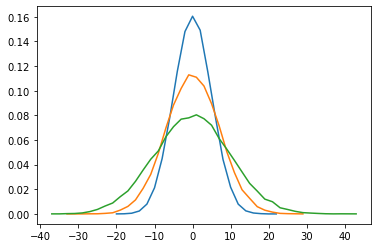

In [33]:
P(25,80000),P(50,40000),P(100,20000)

# 2. Bifurcation
다음으로 주어지는 미분방정식이 있다.$$ \frac{dx}{dt}= rx-x^2. $$

(a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)<br>
1. r=-1, x(0)=2<br>
2. r=-1, x(0)=-2<br>
3. r=1, x(0)=2<br>
4. r=1, x(0)=-2

In [7]:
import sympy
from sympy import symbols
from sympy import *
%matplotlib inline
init_printing()

In [8]:
t = symbols('t')
x = Function('x')
T = np.linspace(0,10)

In [9]:
def gs(t,r):
    return Eq(x(t).diff(t),r*x(t)-x(t)**2)
def gsdsol(t,r,a):
    return dsolve(gs(t,r),ics={x(0):a})

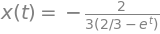

In [10]:
# 1번
gsdsol(t,-1,2)

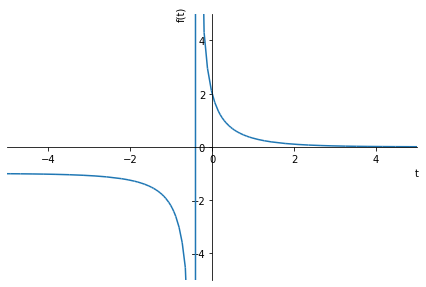

In [11]:
p1 = plot(-2/(3*(2/3-sympy.exp(t))),show=false)
p1.xlim=(-5,5)
p1.ylim=(-5,5)
p1.show()

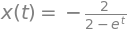

In [12]:
# 2번
gsdsol(t,-1,-2)

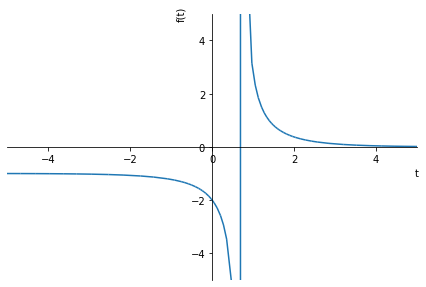

In [13]:
p2 = plot(-2/(2-sympy.exp(t)),show=false)
p2.xlim=(-5,5)
p2.ylim=(-5,5)
p2.show()

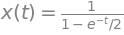

In [14]:
# 3번
gsdsol(t,1,2)

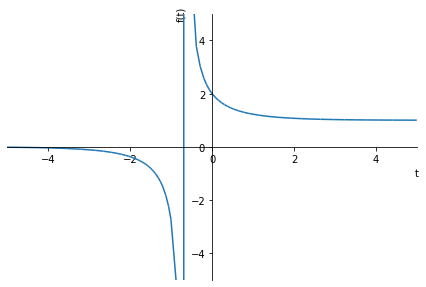

In [15]:
p3 = plot(1/(1-sympy.exp(-t)/2),show=false)
p3.xlim=(-5,5)
p3.ylim=(-5,5)
p3.show()

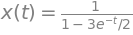

In [16]:
# 4번
gsdsol(t,1,-2)

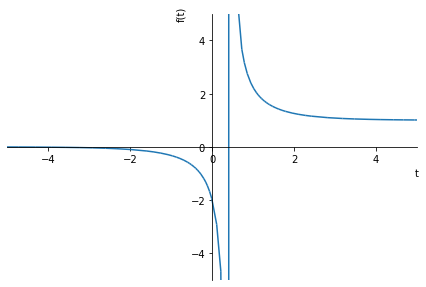

In [17]:
p4 = plot(1/(1-3*sympy.exp(-t)/2),show=false)
p4.xlim=(-5,5)
p4.ylim=(-5,5)
p4.show()

(b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)<br>
즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.$$ 0= rx -x^2. $$

1. r=-1
2. r=1

In [18]:
X = Symbol('x') # (a) 미분방정식 함수로 쓴 x(t)와 구분하기 위해서 대문자로 썼습니다.
def ps(r):
    return r*X-X*X
sympy.solve(ps(1)), sympy.solve(ps(-1))